In [2]:
import pandas as pd
from numpy.ma.extras import average
from sklearn.model_selection import train_test_split

df =pd.read_csv('/Users/orifjonqarshiboyev/Downloads/USA_Housing.csv')
df = df.drop("Address", axis=1)
df.to_csv('USA_Housing_Weka.csv', index=False)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [3]:
df.drop('Avg. Area House Age', axis=1, inplace=True)
df.head()

,Avg. Area Income,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,7.839388,4.23,26354.109472,6.309435e+05


In [7]:

df.drop('Area Population', axis=1, inplace=True)
df.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


In [15]:

from sklearn.model_selection import train_test_split
x=df[['Avg. Area Income']]
y=df[['Price']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("X train shape:",x_train.shape)
print("X test shape:",x_test.shape)

X train shape: (4000, 1)
X test shape: (1000, 1)


In [16]:
from sklearn.linear_model import LinearRegression
lrreg=LinearRegression()
lrreg.fit(x_train,y_train)
print("coefficient",lrreg.coef_)
print("intercept",lrreg.intercept_)


coefficient [[21.20890629]]
intercept [-225053.7028717]


In [18]:
ypred=lrreg.predict(x_test)

NameError: name 'average' is not defined

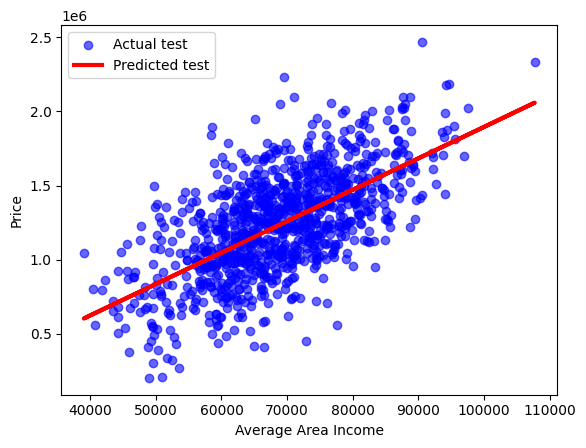

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test, color='blue',alpha=0.6,label='Actual test')
plt.plot(x_test,ypred,color='red',label='Predicted test',linewidth=3)
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.legend()
plt.show()


In [23]:
import numpy as np
def predict(w0,w1,x):
    return w0+w1*x

def gradient_decent(x,y,alpha=1e-10,epochs=3000):
    w0=0.0
    w1=0.0
    n=len(x)
    history=[]
    for _ in range(epochs):
        y_hat=predict(w0,w1,x)
        error=y_hat-y

        dw0=(2/n)*np.sum(error)
        dw1=(2/n)*np.sum(error*x)
        w0=w0-alpha*dw0
        w1=w1-alpha*dw1

        cost=np.mean(error**2)
        history.append(cost)
    return w0,w1,history


In [26]:
x_train_flat=x_train.values.flatten()
w0,w1,history=gradient_decent(x_train_flat,y_train)
print('Gradient descent w0:',w0)
print('Gradient descent w1',w1)

ValueError: Unable to coerce to Series, length must be 1: given 4000